# Python for Physical Modeling 

## Chapter 6 Random Number Generation and Numerical Methods

<hr>

The previous chapters developed a basic set of techniques for importing, creating, and modeling data sets and visualizing the results.  This chapter introduces additional techniques for exploring mathematical models and their predictions:
* Random numbers and Monte Carlo simulations
* Solutions of nonlinear equations of a single variable
* Solutions of linear systems of equations
* Numerical integration of functions
* Numerical solution of ordinary differential equations

In addition, this chapter introduces several new methods for visualizing data, including histograms, sufface plots, contour plots, vector fields plots, and streamlines.

We start with writing your own functions

### 6.1 Writing your own functions

Section 3.3.5 introudced a principle:  Don't duplicate.  Define once, and reuse often.

In the context of parameters (fixed quantities), this means you should define a parameter's value just once at the start of your code and refer to it by name througout the rest of the program.  But code itself can contain duplications if we wish to do the same (or nearly the same) task many times.  Just as with parameter values, you may later realize that something needs to be changed in your code.  Changing every instance of a recurring code fragment can be tedious and prone to error.  It is better to define a function once, then invoke it whenever needed.  You may even use the saem fragment of code inmore than one of your scripts.  If each script imports the same externally defined function, then changes that you make once in the function file will apply to all of your scripts.
     Functions in python can do almost anything.  There are entire libraries of functions that can carry out mathematical operations, make plots, read and write files, and much more.  Your own functions can do all of these things as well.  Functions are ideal for writing code once and reusing it often.


### 6.1.1 Defining functions in Python

A function can be defined at the command prompt or in a file.  The following example is a basic template for creating a function in Python:

In [1]:
# excerpt from measurements.py
def taxicab(pointA, pointB):
    """
    Taxicab metric for computing distance between points A and B.
        pointA = (x1, y1)
        pointB = (x2, y2)
    Returns |x2-x1| + |y2-y1|.  Distances are measured in city blocks.
    """
    interval = abs(pointB[0] - pointA[0]) + abs(pointB[1] - pointA[1])
    return interval


taxicab([2.8, 5.1], [3.3, 4.4])

1.1999999999999993

The "taxicab metric" determines the billable distance between points "as the cab drives" rather than "as the crow flies." . (That is, we use the total distance driven rather than the shortest straight line distance between the two points.)
    The function consists of the following elements:

<b>Declaration:</b>  The keyword ```def``` tells python you are about to define a function.  Function names must adhere to the same rules as variable names.  (See section 1.4.3) . It is wise to give your functions descriptive names.  Remember: You will only have to define it once, but you will wish to reuse it often.  Now is not the time to save typing by giving it a forgettable name like f.

<b>Arguments:</b>  The name of the function is followed by the names of all its arguments:  the data it requires to do its calculation.  In this case, taxicab requires two arguments.  If it is called with only one argument or arguments of the wrong type,  Python will raise a TypeError exception.

<b>Colon:</b>  The colon after the list of arguments begins an indented block of code associated with the function.  Notice the similarity with for and while loops and if statements.  Everything from the colon to the end of the code block will be executed when the function is called.

<b>Docstrings:</b>  The text between the pair of triple-quotes ("""...""") is a docstring.  It is a special comment Python will use if someone asks for help on your function, and it is the standard place to describe what the function does and what arguments are required.  Python will not complain if you do not provide a docstring, but someone who uses your code might.

<b>Body:</b>  The body of the function is the code that does something useful with the arguments.  This example is a simple function, so its body consists of just two lines.  More complicated functions can include loops, if statements, and calls to other functions, and may extend for many lines.

<b>Return:</b>  In Python, a function always returns something to the program that invokes it.  If you do not specify a return value, Python will supply an object called None.  In this example, our function returns a float object.


Now, let's look at how a function call works.  Enter the function definition for taxicab at the command prompt.  (You may have to omit the docstring, but only this one time!) Then, type

In [2]:
fare_rate = 0.40        # fare rate in dollars per city block
start = (1, 2)
stop = (4, 5)
trip_cost = taxicab(start, stop) * fare_rate
print(f"Total trip cost: {trip_cost: .2f}")

Total trip cost:  2.40


When the fourth line is executed, taxicab behaves like np.sqrt and other predefined functions (Section 1.4.2, page 14):
* First, Python assigns the variables in the function's argument list to the objects passed as arguments.  It binds pointA to the same object as start, and pointB to the same object as stop.  (See appendix F for details.)
* Then, Python transfers control to taxicab.
* When taxicab is finished, Python substitutes the return value into the assignment statement for trip_cost.
* Python finishes evaluating the expression and assigns the answer to trip_cost.

Although we defined start and stop as tuples in this example, we can call our new function with any objects that understand what thing[0] and thing[1] mean: lists, tuples, or NumPy arrays.

Your turn 6A:

Define a function to compute the straight line distance between two points in three dimensional space.  Give it a descriptive name and an informative docstring.  See what happens when you call it with the wrong number or type of arguments, and ensure that using help on your function will enable a user to diagnose and resolve the issue.

In [3]:
# define a function to compute the straight line distance between two points in three dimensional space.
def dist_between_points_3d(pointA, pointB):
    """
    Computes the distance between two points in three-dimensional space.
        pointA: (x1, y1, z1)
        pointB: (x2, y2, z2)
    Returns |x2 - x1| + |y2 - y1| + |z2 - z1|
    """
    x1, y1, z1 = pointA[0], pointA[1], pointA[2]
    x2, y2, z2 = pointB[0], pointB[1], pointB[2]
    distance = abs(x2-x1) + abs(y2-y1) + abs(z2-z1)
    return distance

In [4]:
# call function with wrong number of arguments
incorrect_num_arguments = dist_between_points_3d((1, 2, 3))
# this will generate an error

TypeError: dist_between_points_3d() missing 1 required positional argument: 'pointB'

In [5]:
# call function with wrong type of arguments

pointA_string = "3, 2, 4"
pointB_string = "1, 2, 3"

incorrect_type_string = dist_between_points_3d(pointA_string, pointB_string)

# this will generate an error

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [6]:
help(dist_between_points_3d)

Help on function dist_between_points_3d in module __main__:

dist_between_points_3d(pointA, pointB)
    Computes the distance between two points in three-dimensional space.
        pointA: (x1, y1, z1)
        pointB: (x2, y2, z2)
    Returns |x2 - x1| + |y2 - y1| + |z2 - z1|



In some ways, a function is similar to a script.  It is a fragment of code that is executed upon request.  Unlike a script, a function is a Python object.  It can be called by name (once it is defined or imported), and it can be called by another script or function.  A function communicates with the calling program by way of its arguments and its return value.  After evaluating the functions, Python discards all of the function's local variables, so remember:

If a function performs a calculation, ```return``` the result.

You can define functions at the IPython command prompt.  However, if you plan to use a function more than once, you should save it in a file.  You can place a single function in its own file such as taxicab.py and run this file as a script prior to using the function.  (Running the file will define the function as if it had been entered at the command prompt.) . You can also define a function within the script that uses it, as long as its definition gets executed before the function is first called.
If you will be using the same functions in multiple scripts and interactive sessions, you can create a module in which you define one or more functions in a single .py file.  A module is a script that contains a collection of definitions and assignments.  It can be imported into your session from the command prompt, or by placing an ```import``` command within a script.  You can also import selectively, as described in Section 1.3.
Place taxicab and the function you wrote in Your Turn 6A (called, for example, crow) in a single file called measurements.py in your working directory.  Then, type ```import measurements``` you now have access to both functions under the names measurements.taxicab and measurements.crow.
Type help(measurements) and help(measurements.taxicab) to see how Python uses the docstrings you provide.  Note that if you give a module the same name as a function it contains, you still have to provide both the module and function name to Python.  For example, if you save the taxicab function in a file called taxicab.py and then import taxicab, calling taxicab(A,B) will result in an error.  To access the function, you must use taxicab.taxicab(A,B).
Modules that you write and wish to use should be located in the same folder as your main script, which is probably the global working directory you specified during setup.  (See sections 4.1.1 and A.2)

In [7]:
import measurements as msr

In [8]:
help(msr)

Help on module measurements:

NAME
    measurements

FUNCTIONS
    dist_between_points_3d(pointA, pointB)
        Computes the distance between two points in three-dimensional space.
            pointA: (x1, y1, z1)
            pointB: (x2, y2, z2)
        Returns |x2 - x1| + |y2 - y1| + |z2 - z1|
    
    distance(pointA, pointB=(0, 0), metric='taxi')
        Return distance in city blocks between points A, and B.
        If metric is 'taxi' (or omitted), use taxicab metric.
        Otherwise, use Euclidean distance
            pointA = (x1, y1)
            pointB = (x2, y2)
        If pointB is omitted, use the origin.
    
    taxicab(pointA, pointB)
        Taxicab metric for computing distance between points A and B.
            pointA = (x1, y1)
            pointB = (x2, y2)
        Returns |x2-x1| + |y2-y1|.  Distances are measured in city blocks.

FILE
    /private/var/mobile/Containers/Shared/AppGroup/47F181A5-5E44-404F-A9CA-88C1DFEAA965/File Provider Storage/Repositories/Phys

In [9]:
help(msr.taxicab)

Help on function taxicab in module measurements:

taxicab(pointA, pointB)
    Taxicab metric for computing distance between points A and B.
        pointA = (x1, y1)
        pointB = (x2, y2)
    Returns |x2-x1| + |y2-y1|.  Distances are measured in city blocks.



In [10]:
msr.taxicab([0.5, 0.9], [8.8, 9.9])

17.3

In [11]:
msr.dist_between_points_3d((1, 1, 1), (2, 2, 2))

3

### 6.1.2 Updating functions

If you have modified a function in a script or in a module that you created, you will need to instruct python to use the newest versions.  If the function is defined in a script, you can run the script again by using the run button inspyder or the %run command.
If your function is part of a module that you have imported, you may need to restart the IPython kernel or releanch Spyder for the changes to take effect.  Just typing import my_module again will not update the module --even after calling %reset.  Alternatively, you can use a function called reload to update any module without restarting.  This function is part of the importlib module.  To access the reload function, type

In [12]:
from importlib import reload

For example, if you modify the taxicab function's code in measurements.py after importing measurements as a module, you need to save the file and then type the following command:

In [13]:
reload(msr)

<module 'measurements' from '/private/var/mobile/Containers/Shared/AppGroup/47F181A5-5E44-404F-A9CA-88C1DFEAA965/File Provider Storage/Repositories/Physical-Modeling-with-Python/Ch6/measurements.py'>

After, calling import will only cause python to load a module if it has not already been imported.else

You must save a module and then use reload to update functions in a module you have already imported

Reloading a module is usually necessary only in debugging.  Once your functions are working properly, you need only import them once in a script or interactive session.

### 6.1.3 Arguments, keywords, and defaults

We have already seen that keyword arguments can modify the behavior of functions like plt.plot.  You can also use keywords and give arguments default values in functions you write.  The following example demonstrates both of these techniques:

In [14]:
# excerpt from measurements.py
import numpy as np
def distance(pointA, pointB=(0, 0), metric='taxi'):
    """
    Return distance in city blocks between points A, and B.
    If metric is 'taxi' (or omitted), use taxicab metric.
    Otherwise, use Euclidean distance
        pointA = (x1, y1)
        pointB = (x2, y2)
    If pointB is omitted, use the origin.
    """
    if metric == 'taxi':
        interval = abs(pointB[0] - pointA[0]) + abs(pointB[1] - pointA[1])
    else:
        interval = np.sqrt( (pointB[0] - pointA[0])**2 \
                            + (pointB[1] - pointA[1])**2 )
    
    return interval

The distance function decides how to calculate the distance between points based on the value of metric.  Both pointB and metric have default values.  If values for these arguments are passed to the function, it will use them; if not, it will use the defaults.  Run the script measurements.py, then try


distance( (3, 4) )


distance( (3, 4), (1, 2), 'euclid' )


distance( (3, 4), 'euclid' ) .  # this is an error


distance( pointB=(1, 2), metric='normal', pointA=(3, 4) )

In [15]:
reload(msr)

<module 'measurements' from '/private/var/mobile/Containers/Shared/AppGroup/47F181A5-5E44-404F-A9CA-88C1DFEAA965/File Provider Storage/Repositories/Physical-Modeling-with-Python/Ch6/measurements.py'>

In [16]:
msr.distance( (3, 4) )

7

In [17]:
distance( (3, 4), (1, 2), 'euclid' )

2.8284271247461903

In [18]:
distance( (3, 4), 'euclid' )        # this is an error

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [19]:
distance( pointB=(1, 2), metric='normal', pointA=(3, 4) )

2.8284271247461903

The arguments to a function must either be in the correct order according to the function definition, as in the first two lines of this example, or be paried with a keyword, as in the last line.  The third line results in an error because Python assigns the string literal 'euclid', appearing here as a positional argument, to the variable pointB.

### 6.1.4 Return values

A function can take any type or number of arguments -- or none at all.  The return value of a function is a single object, but that object may be a number, an array, a string, or a collection of objects in a tuple or list.  A function will return an object called None if no other return value is specified.
Suppose that you wish to write a function to rotate a two-dimensional vector.  What should the arguments be?  What should the function return?
The arguments should include the vector to be rotated and an angle of rotation.  The function should return the rotated vector.  Here is a function that will accomplish the task:

In [20]:
# rotate.py
def rotate_vector(vector, angle):
    """
    Rotate a two-dimensional vector through given angle.
        vector = (x, y)
        angle = rotation angle in radians (counterclockwise)
    Returns the image of a vector under rotation as a numpy array.
    """
    rotation_matrix = np.array([[ np.cos(angle), -np.sin(angle) ],
                                [ np.sin(angle), np.cos(angle)]])
    return np.dot(rotation_matrix, vector)

This implementation of rotation creates a 2x2 matrix and then multiplies this matrix and the vector supplied as the first argument.  The function does not modify the contents of vector.  Instead, np.dot creates a new array, which is returned by the function.
Python allows you to unpack compound return values, that is, to assign the individual elements of an object to separate variables.  Multiple assignments on a single line, such as x, y=(1,2), are a simple example of unpacking.  Python can unpack any iterable object: a tuple, a list, a string, or an array.
There are several ways to unpack an object.  The following calls to rotate_vector all work, but the components of the rotated vector are split up in different ways:

In [23]:
vec = [1, 1]
theta = np.pi/2
r = rotate_vector(vec, theta)
x, y = rotate_vector(vec, theta)
_, z = rotate_vector(vec, theta)
first, *rest = rotate_vector(vec, theta)

print(f"r: {r}")
print(f"x, y: {x, y}")
print(f"z: {z}")
print(f"first: {first}")
print(f"rest: {rest}")

r: [-1.  1.]
x, y: (-0.9999999999999999, 1.0)
z: 1.0
first: -0.9999999999999999
rest: [1.0]


After executing these commands, you should find that r is a NumPy array with two elements.  The other variables, x, y, and z, contain individual components of the rotated vector.  The underscore, _, is a dummy variable whose value is discarded.  (Underscore is a special variable, whose value is the result of the most recent command.  We are using it to temporarily store a value that we do not need.) . After the final line of this example, first contains the first element of the rotated vector and rest is a list that contains everything else.  In this case, rest contains only one element, but if the function returned an array with 100 elements, first would still contain only the first value and rest would be a list (not a NumPy array) containing the other 99 elements.  You could convert it to an array with np.array(rest).
In addition to unpacking, you can also index or slice the return value of a function.  For example, if you only need the second element of the rotated vector, you could type

In [24]:
w = rotate_vector(vec, theta)[1]
w

1.0

When evaluating this and similar expressions, Python first evaluates the function, then substitutes its return value in place of the function call.

### 6.1.5 Functional programming

Python offers programmers great flexibility in writing functions.  We discuss some of these nuances in Appendix F. However, we strongly endorse the following guidelines for writing your own functions:

1. Pass data to a function only through its arguments.
2. Do not modify the arguments of a function
3. Return the result of a calculation with a ```return``` statement.

Python allows you to circumvent all of these conventions, but your code will be easier to write, interpret, and debug if you adhere to them.  Your functions will accept input (arguments) and produce output (a return value), without side effects.
A side effect is any effect on the computer's satte other than returning a value.  Avoiding side effects is the cornerstone of functional programming.  Sometimes side effects are useful, but consider the alternatives when writing your own functions.
Unintended side effects on arrays can be particularly troublesome.  Python does not automatically create a local copy of an array inside a function.  As a result, a function can modify the data in an array passed as an argument using array methods -- including assignment of individual elements.  (see section 2.2.6, page 26).  Array methods like x.sort() and x.fill(3), as well as in-place arithmetic like x+=1 and x*=2, can also modify array data.  Such side effects have the potential to speed up your code and reduce memory usage for operations on large arrays.  You can overwrite the array and modify its elements without making any copies.  However, this increase in performance comes at the cost of difficulty in debugging.
If you really do intend for a function to modify the elements of an array, you can still avoid side effects.  Create a local copy of the array within the function, operate on the copy, and return the new array.  Alternatively, you can create a placeholder array within the function, fill it with values, and return the arrays, with no effect on x.  If you wish, you can replace the original array with the new array returned by the function in the main code, rather than inside the function.
The following function illustrates these principles of functional programming:

In [25]:
# average.py
def running_average(x):
    """
    Return cumulative average of an array.
    """
    y = np.zeros(len(x))                    # new array to store results
    current_sum = 0.0                       # running sum of elements on x
    for i in range(len(x)):
        current_sum += x[i]                 # increment sum
        y[i] = current_sum / (i + 1.0)      # update running average
    return y

The array being processed is passed as an argument.  This array is not modified; the result of the calculation is returned in a new array.
If you need the extra performance and reduced memory usage that come from overwritting an array, use the information in Appendix F to plan your code carefully and avoid unintended consequences.  However, try vectorizing your code using NumPy's efficient array operations before you resort to overwriting.
Vectorized code will amost always run faster than loops you write yourself in Python.

### 6.2 Random Numbers and Simulation

There are many interesting problems in which we do not have complete knowledge of a system, but we do know the probabilities of the outcomes of simple events.  For example, you know the probability of any given outcome in the roll of a single die is 1/6, but do you know how likely it is that the sum of a roll of five dice is less than 13?  Rather than work out the combinatorics, you could roll five dice many times and determine the probability empirically.
A random number generator makes it possible for a computer to "roll dice" millions of times per second.  Thus, you can use a random number generator to simulate a system described by a stochastic model in which the probability distributions of the parameters are known.  You can determine the likeyly behavbior of the system, even if you cannot work out the details analytically.  Such calculations are often called "Monte Carlo simulations."

### 6.2.1 Simulating coin flips

The simplest examples of a stochastic system is a coin flip.  Suppose that you want to simulate flipping a coin 100 times, record the number of heads or tails, and then repeat the whole series of 100 fips N times.  This will generate a set of N numbers, each falling in the range of 0 to 100, inclusive.
How do we get Python to flip the coin for us?  First, try typing 1 > 2 a the IPython console prompt, and then 2>1.  You'll see that Python returns a Boolean value of True or False when it evaluates each of these expressions.

In [26]:
1 > 2

False

In [27]:
2 >1

True

You can simulate a coin flip by generating a uniformly distributed random number between 0 and 1, then checking to see if it is less than 0.5.  If the comparison returns True, we record heads; if False, we record tails.  Python can also use such values in numeric calculations:  It converts True to 1 and False to 0.

In [49]:
int(False)

0

The module np.random contains random number generators for several probability distributions.  In this chapter, we will only need the "continuous uniform distribution" over the interval [0, 1).

You should explore the other available probability distributions, too.  To use these functions, we create a random number generator object, and then access its methods.  To save typing, we will give the method we want the nickname rand:

In [21]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()   # create a random number generator object
rand = rng.random               # assign its uniform distribution method to rand

To get a thousand random numbers, you can now say rand(1000).  In the future, if you wish to switch to a different probability distribution, you only need to change the second line of code above:  Choose a different method of rng and assign it the same nickname rand.  You can instead access random number generator functions directly from the numpy.random modlule, as we did in Section 1.3.2 and Section 4.3.9: ```from numpy.random import random as rand```.  This works, but the default_rng approach uses an algorithm for generating random numbers that is more efficient and has better statistical properties.  Since we are going to be generating a lot of random numbers, we will use it from now on.
To make a series of independing flips, first create an array called samples that contains 100 random numbers generated by rand.  (Consult help(rand) for a clue about how to do this easily.)  You can then convert the random samples to a simulation of coin flips with flips=(samples<0.5).  Python evaluates the comparison item by item, and stores the result in flips.  You can then count the number of heads by using npsum(flips) or the array method flips.sum().  Repeat this several times to get a feel for how likely it is that exactly 50 heads occur in 100 flips of a fair coin.

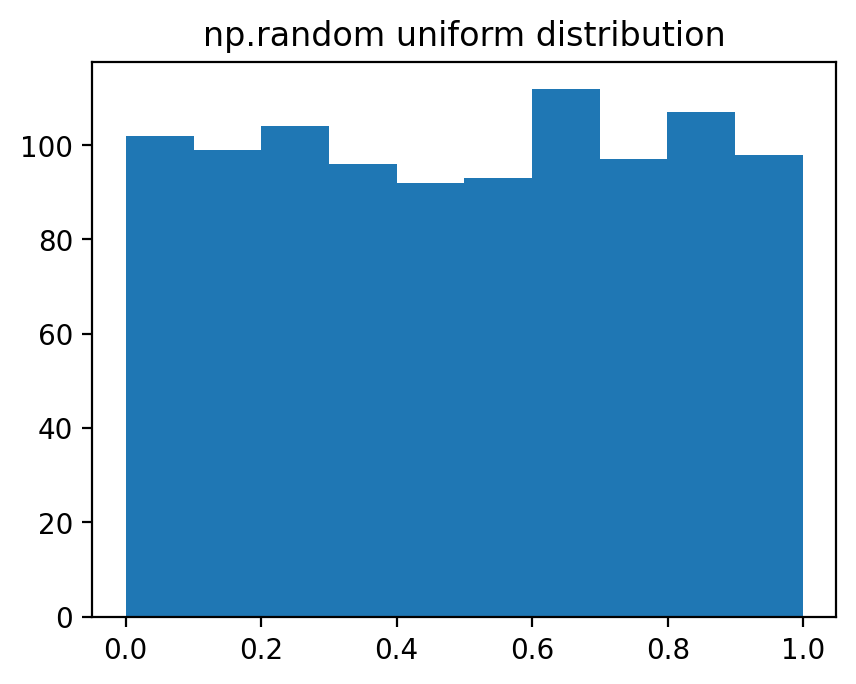

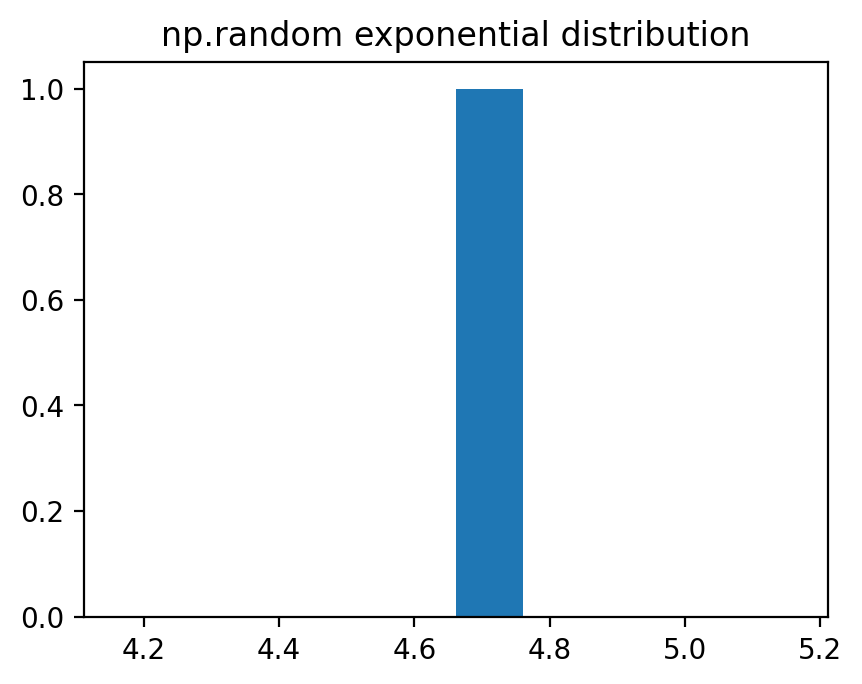

In [34]:
# plot random uniform distribution
uniform_dist = rand(1000)
plt.hist(uniform_dist)
plt.title("np.random uniform distribution")
plt.show()

# plot an alternate distribution (exponential)
rand_exponential = np.random.exponential
exponential_dist = rand_exponential(1000)
plt.hist(exponential_dist)
plt.title("np.random exponential distribution")
plt.show()

In [39]:
help(rand)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [48]:
from numpy.random import random as rand

# create an array that contains 100 random numbers generated by rand
samples = rand(100)
# convert random samples to simulation of coin flips Heads will be True
flips = (samples < 0.5)
# count the number of True values as number of heads flips
#num_heads = np.sum(flips)
num_heads = flips.sum()
# display number of heads
print(f"Number of heads: {num_heads}")

# repeat this experiment several times to see how likely it is to get 50 heads in 100 flips of a fair coin

Number of heads: 41


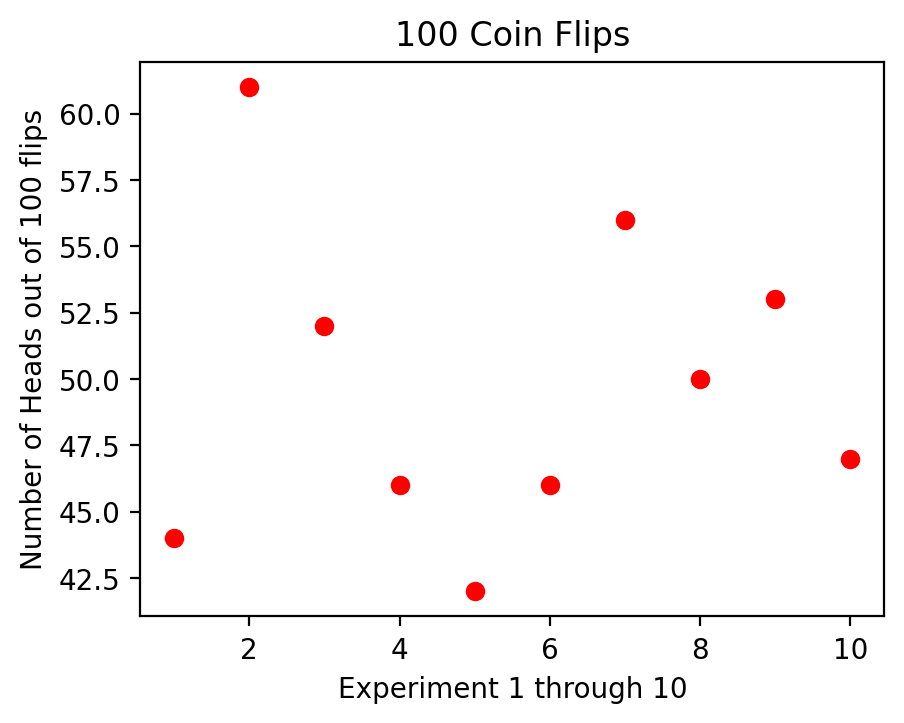

In [2]:
# number of times to repeat experiment
experiment_repititions = 10
# list to hold number of heads in each 100 flips for each experiment repitition
experiment_results = []

# perform 100 flips, record the number of heads, and repeat
for experiment in range(experiment_repititions):
    # create 100 random flips
    samples = rand(100)
    flips = (samples < 0.5)
    num_heads = flips.sum()
    # save number of heads and repeat
    experiment_results.append(num_heads)

x = [i+1 for i in range(experiment_repititions)]
y = experiment_results

plt.plot(x, y, 'ro')
plt.xlabel(f"Experiment 1 through {experiment_repititions}")
plt.ylabel("Number of Heads out of 100 flips")
plt.title("100 Coin Flips")
plt.show()

### 6.2.2 Generating trajectories

We can adapt coin flipping to study random walks, Brownian motion, and a host of other interesting physical and biological systems.  Let's create a random walk of 500 steps.  Our trajectory will consist of 500 x values and 500 y values.  Following good practice (Section 3.3.5), begin with

In [4]:
num_steps = 500

The idea behind a random walk is that every step is a statistically independent, random event.  You know from the preceeding section how to get an array containing 500 random binary digits.  Make two such arrays called x_step and y_step.  For a coin flip, True and False or 1 and 0 were sufficient.  For our random walk, however, we need a random string of +1 and -1 values

#### Your turn 6B:

a. Do a simple algebraic operation on x_step that maps each 1 to a +1 and each 0 to a -1.  Do the same for y_step

b. Next, convert these arrays into successive positions of the random walker.  Consult help(np.cumsum) to see why that function is useful.

c.  Write a script to draw your random walk.  Run it several times.


Try writing a function called get_trajectory that will take the single argument num_steps and return the two arrays that contain the coordinates of a random walker

### 6.3 Histograms and Bar Graphs 

